## **INTRODUÇÃO**

A atividade contida nesse notebook possui o intuito de resolver o problema de otimização pautado na busca de uma liga ternária de forma xA.yB.zC que possua o maior custo possível. As proposições do problema explicitam que a massa total deve ser de 100g e cada elemento precisa ter uma participação de ao menos 5g. 

Para solucionar essa questão, foi implementado um Algoritmo Genético que parte de uma população de ligas aleatórias e as aprimora ao longo de cada uma das gerações, com a selecão das ligas mais "aptas" baseadas no objetivo proposto (nesse caso, as mais caras) para geração de novas soluções.

---

## **AUTORES E CONTRIBUIÇÕES**

**Autores:**

* Caio Matheus Leão Dantas
* Raquel de Godoy Vianna

**Contribuições:** A atividade foi desenvolvida em conjunto, sobretudo no que tange à compreensão do problema e à aplicação em código, enquanto a parte teórica foi realizada separadamente, de modo que ambos contribuíram igualmente para o desenvolvimento da tarefa.

---

## **CÓDIGOS**

O primeiro passo a ser realizado é a importação das bibliotecas necessárias para o desenvolvimento do código e o recebimento das funções definidas no arquivo :"*.py*":

In [1]:
import random as rd
import matplotlib.pyplot as plt
from funcoes_feras import populacao_ligas, funcao_objetivo_pop_ligas, selecao_torneio_max, cruzamentos_uniformes, mutacao_ligas

E a definição dos hiperparâmetros que serão utilizados no processo de evolução por gerações:

In [2]:
TAMANHO_POPULACAO = 100
TAMANHO_TORNEIO = 3
NUM_GERACOES = 50
CHANCE_DE_CRUZAMENTO = 0.5
CHANCE_DE_MUTACAO = 0.05

Definimos o dicionário disponibilizado associado ao preço dos elementos em dólares por quilograma:


In [3]:
preco = {
    "H": 1.39, "He": 24, "Li": 85.6, "Be": 857, "B": 3.68, "C": 0.122, "N": 0.14, "O": 0.154,
    "F": 2.16, "Ne": 240, "Na": 3.43, "Mg": 2.32, "Al": 1.79, "Si": 1.7, "P": 2.69, "S": 0.0926,
    "Cl": 0.082, "Ar": 0.931, "K": 13.6, "Ca": 2.35, "Sc": 3460, "Ti": 11.7, "V": 385, "Cr": 9.4,
    "Mn": 1.82, "Fe": 0.424, "Co": 32.8, "Ni": 13.9, "Cu": 6, "Zn": 2.55, "Ga": 148, "Ge": 1010,
    "As": 1.31, "Se": 21.4, "Br": 4.39, "Kr": 290, "Rb": 15500, "Sr": 6.68, "Y": 31, "Nb": 85.6,
    "Mo": 40.1, "Tc": 100000, "Ru": 10600, "Rh": 147000, "Pd": 49500, "Ag": 521, "Cd": 2.73,
    "In": 167, "Sn": 18.7, "Sb": 5.79, "Te": 63.5, "I": 35, "Xe": 1800, "Cs": 61800, "Ba": 0.275,
    "La": 4.92, "Ce": 4.71, "Pr": 103, "Nd": 57.5, "Pm": 460000, "Sm": 13.9, "Eu": 31.4, "Gd": 28.6,
    "Tb": 658, "Dy": 307, "Ho": 57.1, "Er": 26.4, "Tm": 3000, "Yb": 17.1, "Lu": 643, "Hf": 900,
    "Ta": 312, "W": 35.3, "Re": 4150, "Os": 12000, "Ir": 56200, "Pt": 27800, "Hg": 30.2,
    "Tl": 4200, "Pb": 2, "Bi": 6.36, "Po": 49200000000000, "Ac": 29000000000000, "Th": 287,
    "Pa": 280000, "U": 101, "Np": 660000, "Pu": 6490000, "Am": 750000, "Cm": 160000000000,
    "Bk": 185000000000, "Cf": 185000000000
}

E, de acordo com o requisitado no problema, obtemos o preço em dólares por grama:

In [4]:
for i in preco:
  preco[i] = preco[i] * 1000

preco

{'H': 1390.0,
 'He': 24000,
 'Li': 85600.0,
 'Be': 857000,
 'B': 3680.0,
 'C': 122.0,
 'N': 140.0,
 'O': 154.0,
 'F': 2160.0,
 'Ne': 240000,
 'Na': 3430.0,
 'Mg': 2320.0,
 'Al': 1790.0,
 'Si': 1700.0,
 'P': 2690.0,
 'S': 92.60000000000001,
 'Cl': 82.0,
 'Ar': 931.0,
 'K': 13600.0,
 'Ca': 2350.0,
 'Sc': 3460000,
 'Ti': 11700.0,
 'V': 385000,
 'Cr': 9400.0,
 'Mn': 1820.0,
 'Fe': 424.0,
 'Co': 32800.0,
 'Ni': 13900.0,
 'Cu': 6000,
 'Zn': 2550.0,
 'Ga': 148000,
 'Ge': 1010000,
 'As': 1310.0,
 'Se': 21400.0,
 'Br': 4390.0,
 'Kr': 290000,
 'Rb': 15500000,
 'Sr': 6680.0,
 'Y': 31000,
 'Nb': 85600.0,
 'Mo': 40100.0,
 'Tc': 100000000,
 'Ru': 10600000,
 'Rh': 147000000,
 'Pd': 49500000,
 'Ag': 521000,
 'Cd': 2730.0,
 'In': 167000,
 'Sn': 18700.0,
 'Sb': 5790.0,
 'Te': 63500.0,
 'I': 35000,
 'Xe': 1800000,
 'Cs': 61800000,
 'Ba': 275.0,
 'La': 4920.0,
 'Ce': 4710.0,
 'Pr': 103000,
 'Nd': 57500.0,
 'Pm': 460000000,
 'Sm': 13900.0,
 'Eu': 31400.0,
 'Gd': 28600.0,
 'Tb': 658000,
 'Dy': 307000,
 'Ho'

Definimos uma população de composições de ligas possíveis, compostas por cada um dos três elementos seguidos por suas quantidades, no modelo ("A", "B", "C", "x", "y", "z") para um elemento xA.yB.zC:

In [5]:
populacao = populacao_ligas(TAMANHO_POPULACAO, preco)

Com tudo já definido, realizamos o processo evolutivo por épocas com os processos de seleção, cruzamento e mutação, reparando os indivíduos se necessário:

In [6]:
hall_da_fama = []
historico_fitness = []

for n in range(NUM_GERACOES):

    # Seleção
    fitness = funcao_objetivo_pop_ligas(populacao, preco)
    selecionados = selecao_torneio_max(populacao, fitness, TAMANHO_TORNEIO)

    # Cruzamento
    proxima_geracao = []
    for pai, mae in zip(selecionados[::2], selecionados[1::2]):
        individuo1, individuo2 = cruzamentos_uniformes(pai, mae, CHANCE_DE_CRUZAMENTO, list(preco.keys()))
        proxima_geracao.append(individuo1)
        proxima_geracao.append(individuo2)

    # Mutação
    mutacao_ligas(proxima_geracao, CHANCE_DE_MUTACAO, list(preco.keys()), preco)

    # Atualização do hall da fama
    fitness = funcao_objetivo_pop_ligas(proxima_geracao, preco)

    maior_fitness = max(fitness)
    indice = fitness.index(maior_fitness)
    hall_da_fama.append(proxima_geracao[indice])

    # Armazenamento dos fitness
    historico_fitness.append(max(fitness))

    # Encerramento
    populacao = proxima_geracao

A partir da evolução por épocas, obtemos o indivíduo melhor avaliado e qual a configuração de elementos associada a ele:

In [7]:
fitness = funcao_objetivo_pop_ligas(hall_da_fama, preco)
maior_fitness = max(fitness)
indice = fitness.index(maior_fitness)
melhor_individuo_observado = hall_da_fama[indice]

melhor_individuo_observado

[90, 5, 5, 'Po', 'Bk', 'Ac']

A partir disso, podemos realizar a plotagem da evolução do fitness obtido em cada uma das gerações, entendendo o desempenho do modelo:

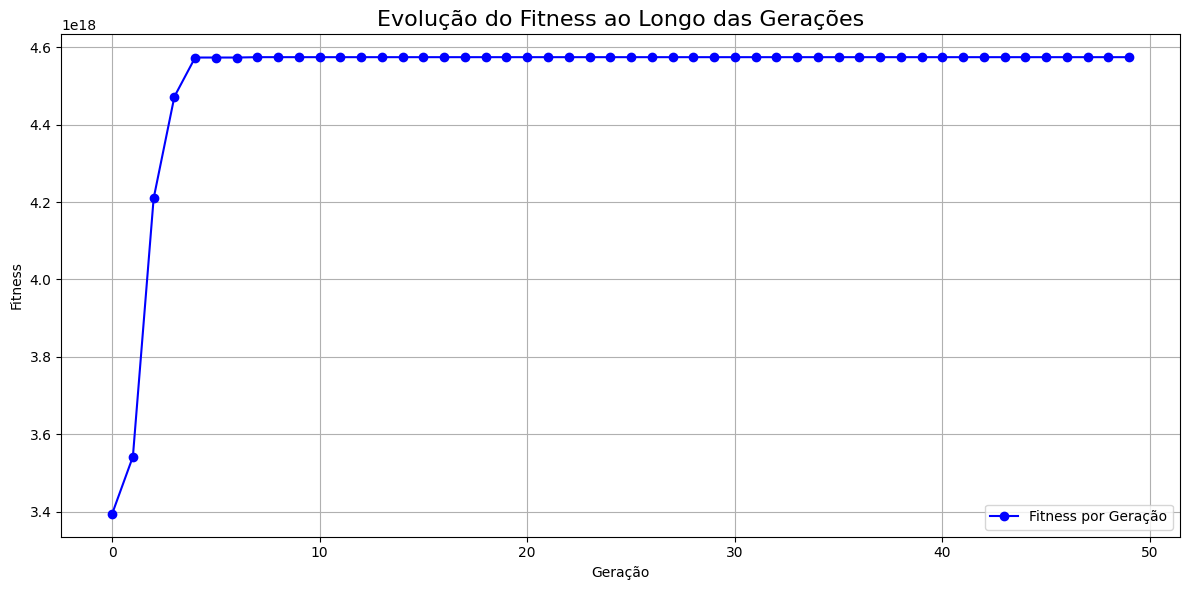

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(historico_fitness, label='Fitness por Geração', color='blue', marker='o', linestyle='-')
plt.title('Evolução do Fitness ao Longo das Gerações', fontsize=16)
plt.xlabel('Geração')
plt.ylabel('Fitness')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

---

## **CONCLUSÃO**

Com a atividade desenvolvida no presente notebook, foi possível evoluir um algoritmo genético capaz de, a partir de um dicionário contendo preços associados a diferentes elementos químicos, propor a liga ternária mais cara, seguindo as delimitações definidas pelo enunciado do exercício. Desse modo, a prática realizada foi crucial para um maior aprofundamento acerca da implementação e adaptação de algoritmos genéticos num contexto de maximização, tendo permitido a exploração de um problema novo de otimização!

---

## **REFERÊNCIAS**

**[1]** CASSAR, Daniel. Redes Neurais e Algoritmos Genéticos. 2025. Material de Aula.